<a href="https://www.kaggle.com/code/lightonkalumba/indian-liver-disease-prediction-with-ml?scriptVersionId=265451892" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# 1. Introduction & Setup

In this notebook, we perform a Machine Learning (ML) analysis on the Indian Liver Patient Dataset.
We will explore the data, preprocess it, and train ML models to classify whether a patient is likely to have a liver condition based on biochemical and demographic features.

Key Steps:

- Data Cleaning & Exploration

- Visualizations of important features

- Machine Learning modeling (Logistic Regression, Random Forest, Gradient Boosting)

- Evaluation & Insights

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, accuracy_score

In [2]:
sns.set(style="whitegrid")
plt.style.use("seaborn-v0_8")

# 2. Load Dataset

We load the Indian Liver Patient dataset and check its structure.

In [3]:
df = pd.read_csv("/kaggle/input/indian-liver-patient-dataset/Indian Liver Patient Dataset (ILPD).csv")
print("Shape:", df.shape)
df.head()

Shape: (583, 11)


,age,gender,tot_bilirubin,direct_bilirubin,tot_proteins,albumin,ag_ratio,sgpt,sgot,alkphos,is_patient
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


# 3. Data Overview & Cleaning

We inspect missing values, data types, and summary statistics.

In [4]:
print(df.info())
print("\nMissing values:\n", df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               583 non-null    int64  
 1   gender            583 non-null    object 
 2   tot_bilirubin     583 non-null    float64
 3   direct_bilirubin  583 non-null    float64
 4   tot_proteins      583 non-null    int64  
 5   albumin           583 non-null    int64  
 6   ag_ratio          583 non-null    int64  
 7   sgpt              583 non-null    float64
 8   sgot              583 non-null    float64
 9   alkphos           579 non-null    float64
 10  is_patient        583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB
None

Missing values:
 age                 0
gender              0
tot_bilirubin       0
direct_bilirubin    0
tot_proteins        0
albumin             0
ag_ratio            0
sgpt                0
sgot                0


In [5]:
df.describe(include="all")

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,age,gender,tot_bilirubin,direct_bilirubin,tot_proteins,albumin,ag_ratio,sgpt,sgot,alkphos,is_patient
count,583.000000,583,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,579.000000,583.000000
unique,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,441,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,44.746141,NaN,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064,1.286449
std,16.189833,NaN,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.319592,0.452490
min,4.000000,NaN,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,NaN,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,NaN,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000
75%,58.000000,NaN,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,2.000000


# 4. Exploratory Data Analysis (EDA)

We explore distributions, correlations, and relationships between features and liver disease.

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


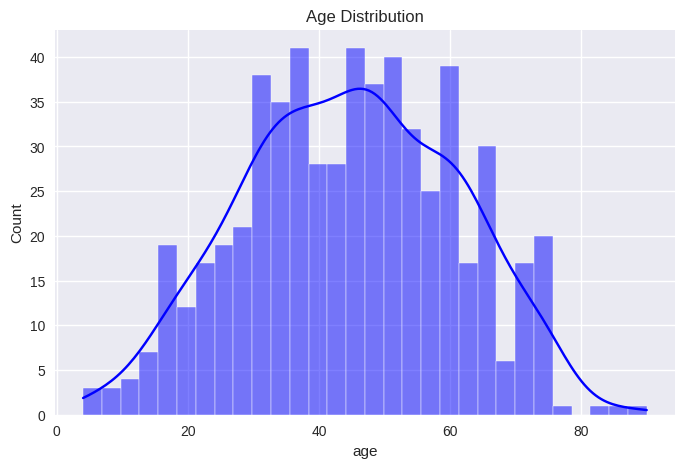

In [6]:
plt.figure(figsize=(8,5))
sns.histplot(df['age'], bins=30, kde=True, color="blue")
plt.title("Age Distribution")
plt.show()

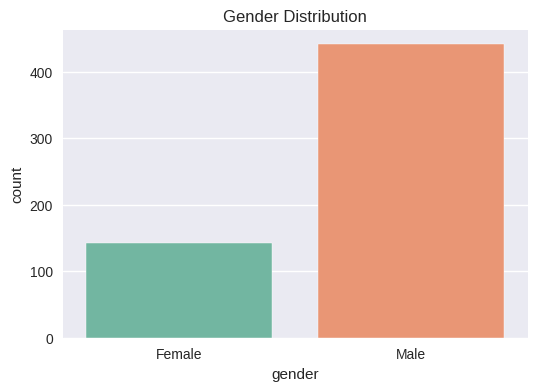

In [7]:
plt.figure(figsize=(6,4))
sns.countplot(x='gender', data=df, palette="Set2")
plt.title("Gender Distribution")
plt.show()

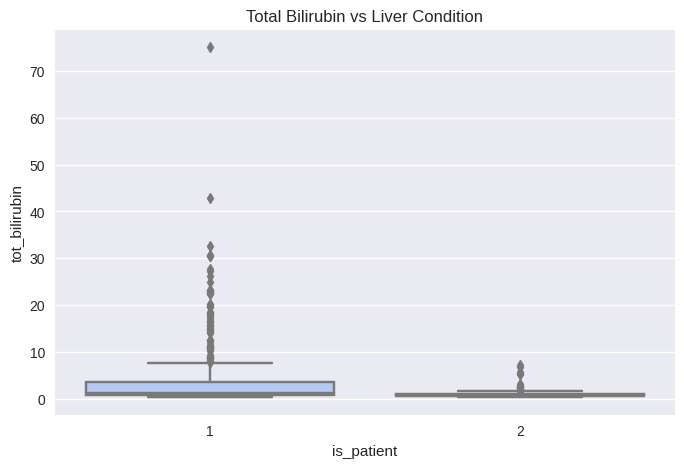

In [8]:
plt.figure(figsize=(8,5))
sns.boxplot(x="is_patient", y="tot_bilirubin", data=df, palette="coolwarm")
plt.title("Total Bilirubin vs Liver Condition")
plt.show()

# 5. Data Preprocessing

We will:

- Encode categorical columns (gender)

- Handle missing values

- Scale numerical features

In [9]:
df['gender'] = LabelEncoder().fit_transform(df['gender'])

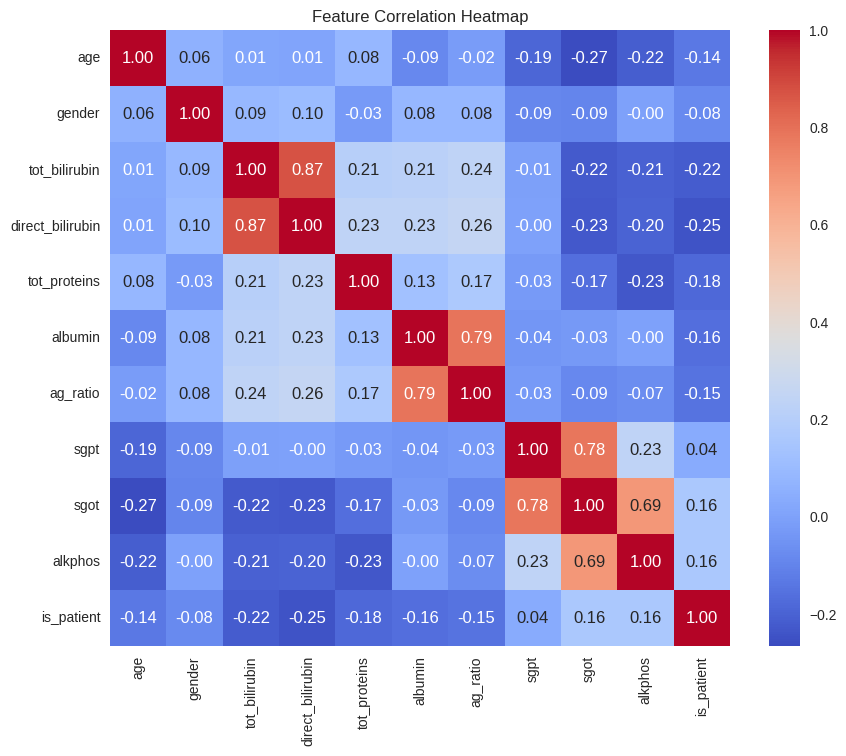

In [10]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

In [11]:
df = df.fillna(df.median())

In [12]:
X = df.drop("is_patient", axis=1)
y = df["is_patient"]

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [14]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 6. Machine Learning Models

We will train three models:

1. Logistic Regression

2. Random Forest

3. Gradient Boosting

In [15]:
#Logisitic Regression
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)
y_pred_log = log_reg.predict(X_test)

In [16]:
#RandomForest
rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

In [17]:
#Gradient Boosting
gb = GradientBoostingClassifier(n_estimators=200, random_state=42)
gb.fit(X_train, y_train)
y_pred_gb = gb.predict(X_test)

# 7. Model Evaluation

We compare performance across Accuracy, Precision, Recall, F1, and ROC-AUC.

In [18]:
def evaluate_model(name, y_true, y_pred):
    print(f"---- {name} ----")
    print(classification_report(y_true, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_true, y_pred))
    print("-"*40)

evaluate_model("Logistic Regression", y_test, y_pred_log)
evaluate_model("Random Forest", y_test, y_pred_rf)
evaluate_model("Gradient Boosting", y_test, y_pred_gb)

---- Logistic Regression ----
              precision    recall  f1-score   support

           1       0.73      0.90      0.81        83
           2       0.43      0.18      0.25        34

    accuracy                           0.69       117
   macro avg       0.58      0.54      0.53       117
weighted avg       0.64      0.69      0.64       117

Confusion Matrix:
 [[75  8]
 [28  6]]
----------------------------------------
---- Random Forest ----
              precision    recall  f1-score   support

           1       0.71      0.77      0.74        83
           2       0.30      0.24      0.26        34

    accuracy                           0.62       117
   macro avg       0.50      0.50      0.50       117
weighted avg       0.59      0.62      0.60       117

Confusion Matrix:
 [[64 19]
 [26  8]]
----------------------------------------
---- Gradient Boosting ----
              precision    recall  f1-score   support

           1       0.73      0.76      0.75        

---- Logistic Regression ----
              precision    recall  f1-score   support

           1       0.73      0.90      0.81        83
           2       0.43      0.18      0.25        34

    accuracy                           0.69       117
   macro avg       0.58      0.54      0.53       117
weighted avg       0.64      0.69      0.64       117



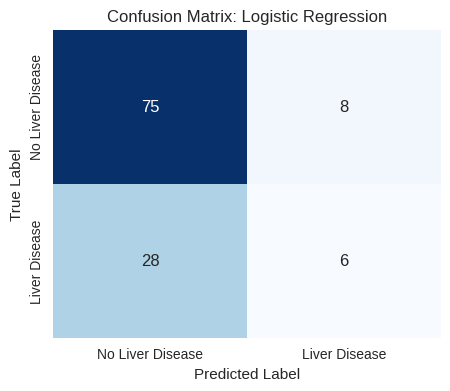

--------------------------------------------------
---- Random Forest ----
              precision    recall  f1-score   support

           1       0.71      0.77      0.74        83
           2       0.30      0.24      0.26        34

    accuracy                           0.62       117
   macro avg       0.50      0.50      0.50       117
weighted avg       0.59      0.62      0.60       117



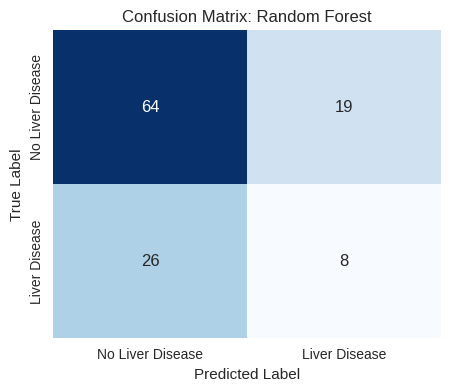

--------------------------------------------------
---- Gradient Boosting ----
              precision    recall  f1-score   support

           1       0.73      0.76      0.75        83
           2       0.35      0.32      0.34        34

    accuracy                           0.63       117
   macro avg       0.54      0.54      0.54       117
weighted avg       0.62      0.63      0.63       117



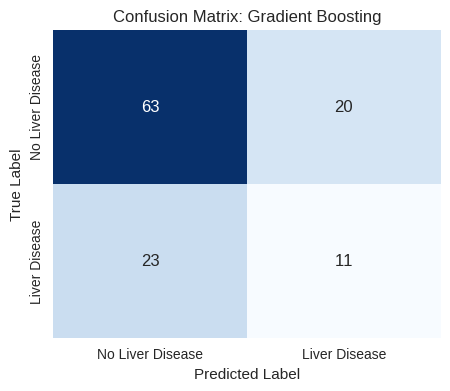

--------------------------------------------------


In [19]:
# %% [code]
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

def evaluate_model(name, y_true, y_pred):
    """
    Print classification report and plot confusion matrix heatmap.
    """
    print(f"---- {name} ----")
    print(classification_report(y_true, y_pred))
    
    # Confusion Matrix
    cm = confusion_matrix(y_true, y_pred)
    
    plt.figure(figsize=(5,4))
    sns.heatmap(
        cm, annot=True, fmt='d', cmap="Blues", cbar=False,
        xticklabels=["No Liver Disease", "Liver Disease"],
        yticklabels=["No Liver Disease", "Liver Disease"]
    )
    plt.title(f"Confusion Matrix: {name}")
    plt.ylabel("True Label")
    plt.xlabel("Predicted Label")
    plt.show()
    print("-"*50)

# ---- Call the function for each model ----
# Make sure y_test and y_pred_* exist before calling these
evaluate_model("Logistic Regression", y_test, y_pred_log)
evaluate_model("Random Forest", y_test, y_pred_rf)
evaluate_model("Gradient Boosting", y_test, y_pred_gb)


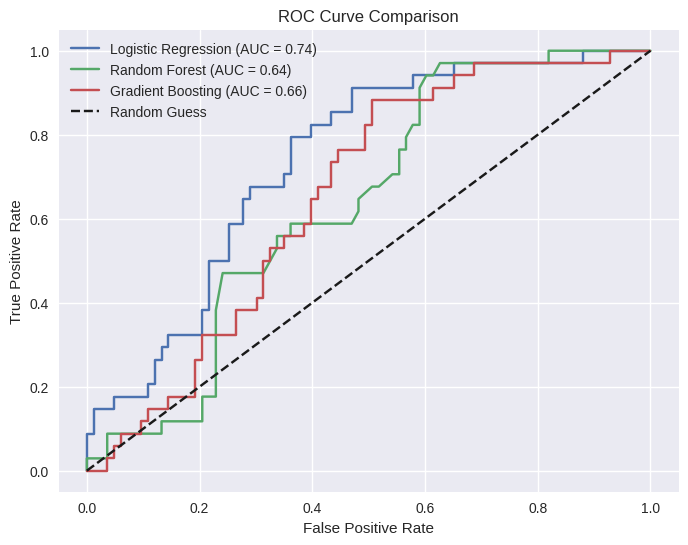

In [20]:
# %% [code]
# Plot ROC curves for models, with pos_label specified
plt.figure(figsize=(8,6))

def plot_roc_curve(model, X_test, y_test, model_name):
    if hasattr(model, "predict_proba"):
        y_prob = model.predict_proba(X_test)[:,1]  # probability for positive class
    else:
        y_prob = model.decision_function(X_test)
    
    # Specify pos_label=2 if your positive class is 2
    fpr, tpr, _ = roc_curve(y_test, y_prob, pos_label=2)
    auc_score = roc_auc_score(y_test, y_prob)
    
    plt.plot(fpr, tpr, label=f"{model_name} (AUC = {auc_score:.2f})")

# Call function with correct model variable names
plot_roc_curve(log_reg, X_test, y_test, "Logistic Regression")
plot_roc_curve(rf, X_test, y_test, "Random Forest")
plot_roc_curve(gb, X_test, y_test, "Gradient Boosting")

plt.plot([0,1], [0,1], 'k--', label="Random Guess")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend()
plt.show()
